<a href="https://colab.research.google.com/github/vijayalakshmisatya/Volkswagen/blob/main/VOLKSWAGEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader


[%] Downloading Images to /content/dataset/new car tire


[!!]Indexing page: 1

[%] Indexed 95 Images on Page 1.


[%] Downloading Image #1 from https://images.hgmsites.net/hug/chevrolet-bolt-ev-fitted-with-prototype-airless-tires-from-michelin_100702941_h.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/pile-of-tires-on-white-background-royalty-free-image-672151801-1561751929.jpg?crop=1.00xw:0.629xh;0,0.311xh&amp;resize=1200:*
[%] File Downloaded !

[%] Downloading Image #3 from http://gmauthority.com/blog/wp-content/uploads/2019/10/UPTIS-Airless-Tire-Michelin-Tire-006.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.elkrivertireandauto.com/images/new_tire_sales.jpeg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.tractionnews.com/wp-content/uploads/2019/06/Michelin_Uptis_airless_wheel.jpg
[!] Issue getting: http://www.tractionnews.com/wp-content/uploads/2019/06/Michelin_Uptis_airl

In [ ]:

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation sets
)

# Data rescaling for validation images
validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='training'  # Use the training split
)


validation_generator = validation_datagen.flow_from_directory(
    'dataset',  # Same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Same class mode
    subset='validation'  # Use the validation split
)


# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax') # Output layer with softmax for multiple classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multiple classes
              metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          epochs=10,  # Adjust the number of epochs
          validation_data=validation_generator)

# Save the trained model
model.save('tire_condition_model.h5')


#To use the model for prediction:
# Load the saved model
#loaded_model = tf.keras.models.load_model('tire_condition_model.h5')
# Preprocess a new image (resize, normalize)
#prediction = loaded_model.predict(new_image)

Found 159 images belonging to 4 classes.
Found 39 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.2668 - loss: 2.6919 - val_accuracy: 0.3077 - val_loss: 1.4543
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3368 - loss: 1.3572 - val_accuracy: 0.2308 - val_loss: 1.3341
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3027 - loss: 1.3102 - val_accuracy: 0.4103 - val_loss: 1.2836
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4836 - loss: 1.2364 - val_accuracy: 0.3590 - val_loss: 1.2655
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4878 - loss: 1.1575 - val_accuracy: 0.3846 - val_loss: 1.2438
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4829 - loss: 1.0726 - val_accuracy: 0.5641 - val_loss: 1.2418
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6154 - loss: 0.9958 - val_accuracy: 0.4615 - val_loss: 1.2732
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6727 - loss: 1.0244 - val_accuracy: 0.6410 - val_loss: 1.1603
Epoch 9/10
5/5 ━━━━

CAR DISTANCE AND FORCE PREDICTION

> Add blockquote



Distance to Road Edge: 25 pixels
Predicted Force: 2.5


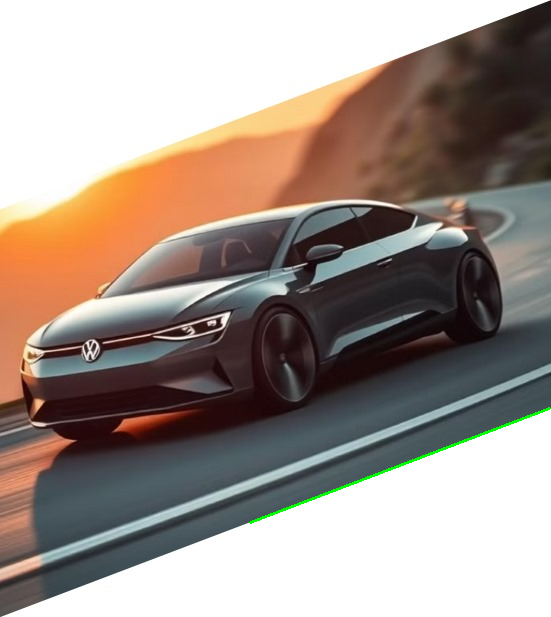

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

def detect_road_edges(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return

    # Convert to grayscale and apply edge detection (e.g., Canny)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    # Detect lines (assuming road edges are linear)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=100, maxLineGap=10)

    if lines is not None:
        # Initialize variables to store the closest edge
        closest_edge = None
        min_distance = float('inf')

        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Calculate the distance from the tire to the edge
            image_height, image_width, _ = image.shape
            tire_x, tire_y = image_width // 2, image_height
            distance = abs(tire_x - x1)

            # Update the closest edge if the current edge is closer
            if distance < min_distance:
                min_distance = distance
                closest_edge = (x1, y1, x2, y2)

        if closest_edge:
            x1, y1, x2, y2 = closest_edge
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw the closest edge

            # Predict the force based on the distance to the closest edge
            predicted_force = min_distance * 0.1

            print(f"Distance to Road Edge: {min_distance} pixels")
            print(f"Predicted Force: {predicted_force}")

            cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print("No closest edge detected.")
    else:
        print("No lines detected.")

# Input image
image_path = '/content/car_image.jpg'  # Update with your image path
detect_road_edges(image_path)

Distance to Road Edge: 83 pixels
Predicted Force: 8.3


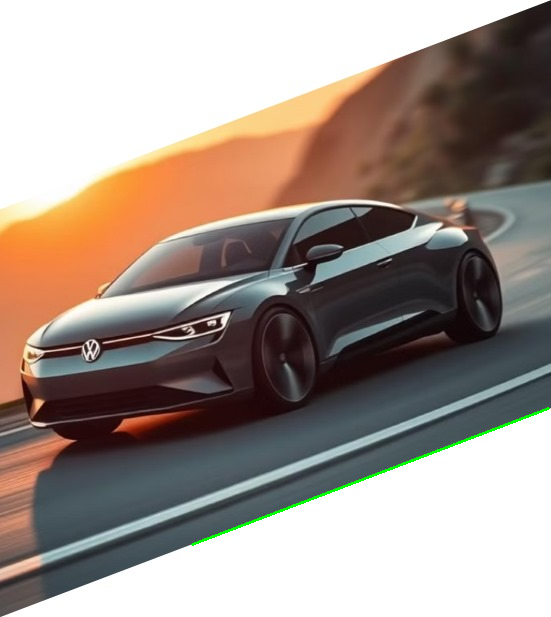

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab


def detect_road_edges(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return

    # Convert to grayscale and apply edge detection (e.g., Canny)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Adjusted threshold values

    # Detect lines (assuming road edges are linear)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=100, maxLineGap=10)

    if lines is not None:
        # Initialize variables to store the closest edge
        closest_edge = None
        min_distance = float('inf')

        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Calculate the distance from the tire to the edge
            image_height, image_width, _ = image.shape
            tire_x, tire_y = image_width // 2, image_height

            # Introduce a minor adjustment to avoid division by zero
            if x1 != tire_x:
                distance = abs(x1 - tire_x)
                # Update the closest edge if the current edge is closer
                if distance < min_distance and distance > 0:  # Ensure distance is greater than 0
                    min_distance = distance
                    closest_edge = (x1, y1, x2, y2)

        if closest_edge:
            x1, y1, x2, y2 = closest_edge
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw the closest edge

            # Predict the force based on the distance to the closest edge
            predicted_force = min_distance * 0.1

            print(f"Distance to Road Edge: {min_distance} pixels")
            print(f"Predicted Force: {predicted_force}")

            # Use cv2_imshow instead of cv2.imshow in Colab
            cv2_imshow(image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print("No closest edge detected with a distance greater than 0.")
    else:
        print("No lines detected.")

# Input image
image_path = '/content/car_image.jpg'  # Update with your image path
detect_road_edges(image_path)

Distance to Road Edge: 3 pixels
Predicted Force: 0.30000000000000004


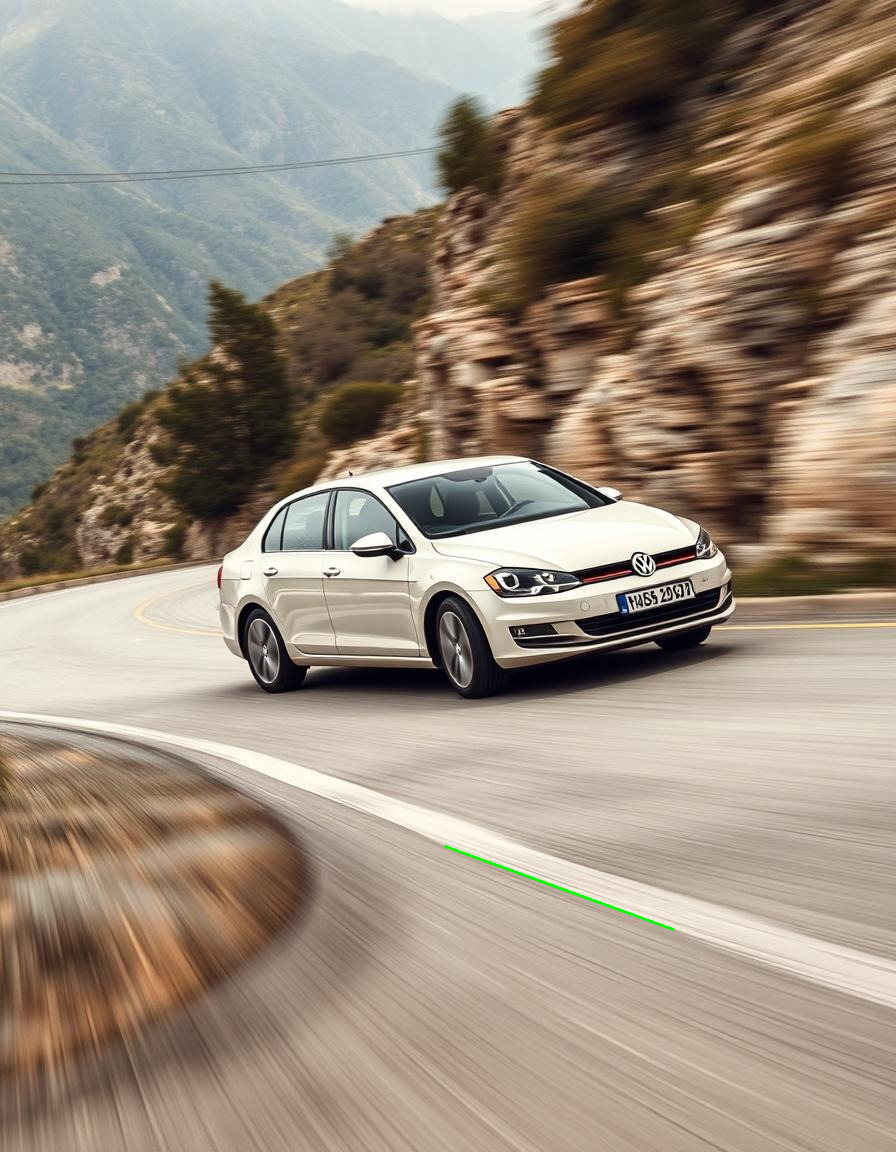

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab


def detect_road_edges(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return

    # Convert to grayscale and apply edge detection (e.g., Canny)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Adjusted threshold values

    # Detect lines (assuming road edges are linear)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=100, maxLineGap=10)

    if lines is not None:
        # Initialize variables to store the closest edge
        closest_edge = None
        min_distance = float('inf')

        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Calculate the distance from the tire to the edge
            image_height, image_width, _ = image.shape
            tire_x, tire_y = image_width // 2, image_height

            # Introduce a minor adjustment to avoid division by zero
            if x1 != tire_x:
                distance = abs(x1 - tire_x)
                # Update the closest edge if the current edge is closer
                if distance < min_distance and distance > 0:  # Ensure distance is greater than 0
                    min_distance = distance
                    closest_edge = (x1, y1, x2, y2)

        if closest_edge:
            x1, y1, x2, y2 = closest_edge
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw the closest edge

            # Predict the force based on the distance to the closest edge
            predicted_force = min_distance * 0.1

            print(f"Distance to Road Edge: {min_distance} pixels")
            print(f"Predicted Force: {predicted_force}")

            # Use cv2_imshow instead of cv2.imshow in Colab
            cv2_imshow(image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print("No closest edge detected with a distance greater than 0.")
    else:
        print("No lines detected.")

# Input image
image_path = '/content/car_image2.jpg'  # Update with your image path
detect_road_edges(image_path)

Distance to Road Edge: 34 pixels
Predicted Force: 3.4000000000000004


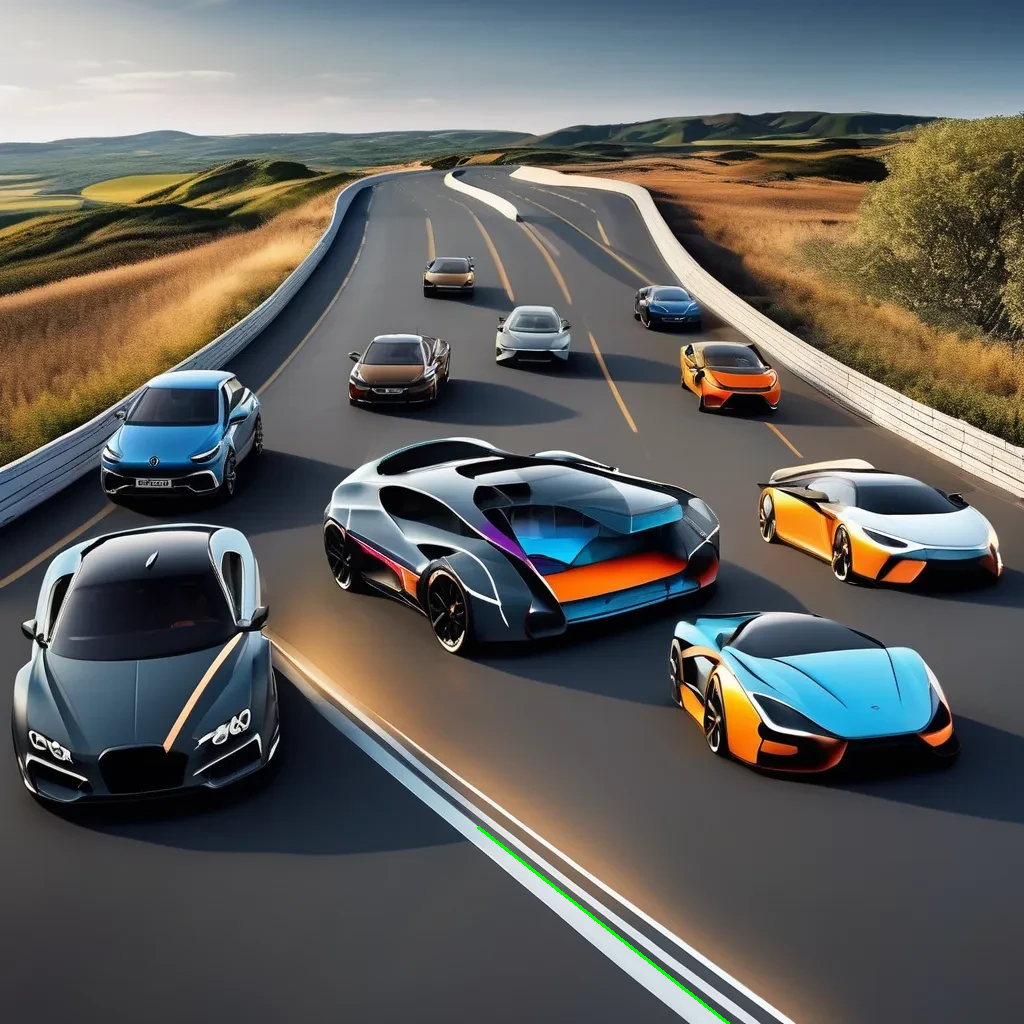

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab


def detect_road_edges(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return

    # Convert to grayscale and apply edge detection (e.g., Canny)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Adjusted threshold values

    # Detect lines (assuming road edges are linear)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=100, maxLineGap=10)

    if lines is not None:
        # Initialize variables to store the closest edge
        closest_edge = None
        min_distance = float('inf')

        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Calculate the distance from the tire to the edge
            image_height, image_width, _ = image.shape
            tire_x, tire_y = image_width // 2, image_height

            # Introduce a minor adjustment to avoid division by zero
            if x1 != tire_x:
                distance = abs(x1 - tire_x)
                # Update the closest edge if the current edge is closer
                if distance < min_distance and distance > 0:  # Ensure distance is greater than 0
                    min_distance = distance
                    closest_edge = (x1, y1, x2, y2)

        if closest_edge:
            x1, y1, x2, y2 = closest_edge
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw the closest edge

            # Predict the force based on the distance to the closest edge
            predicted_force = min_distance * 0.1

            print(f"Distance to Road Edge: {min_distance} pixels")
            print(f"Predicted Force: {predicted_force}")

            # Use cv2_imshow instead of cv2.imshow in Colab
            cv2_imshow(image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print("No closest edge detected with a distance greater than 0.")
    else:
        print("No lines detected.")

# Input image
image_path = '/content/car_image1.jpg'  # Update with your image path
detect_road_edges(image_path)